# 1) Get and understand your data

In [1]:

# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

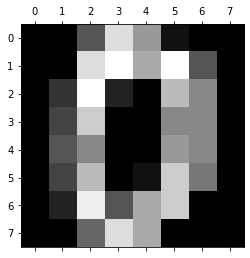

In [2]:
# Show one data

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

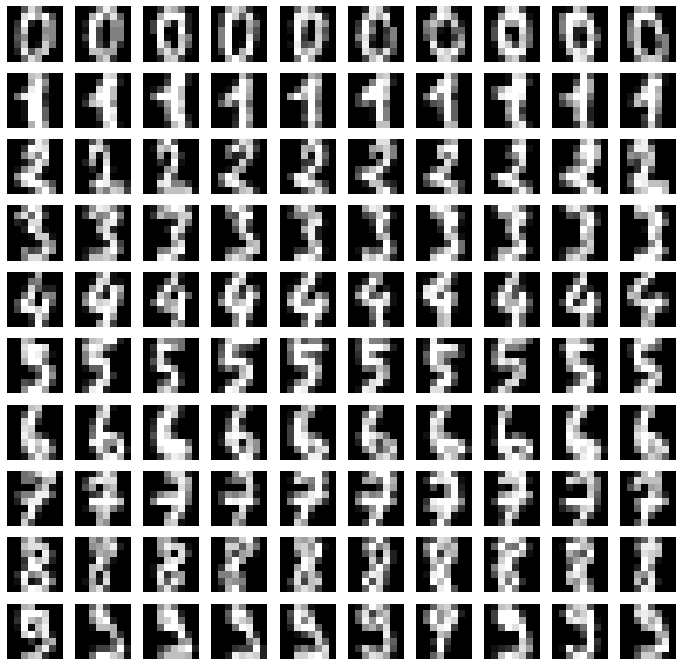

In [3]:

# Show several data for each label (== category) 

X = digits.images
Y = digits.target



n_digits = np.unique(Y)

M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

### What is the type of the data ?

Data's are Images, it is Object type

### How many pixel has one data instance ?

One data instance have 64 pixel, 8x8

### What is the type of data of one pixel ? what does it represents ?

The type of data of one pixel is Float, it represents the variation of gray color.

# 2) Prepare your ML algorithm

### explain the purpose of the training set ?

The training set, which will allow us to train our model and will be used by the learning algorithm.

### explain the purpose of the testing set ?

The testing set, which measures the error of the final model on data it has never seen. We will simply pass this data as if it were data that we have never encountered before (as it will then happen in practice to predict new data) and measure the performance of our model on this data. . This is also called held-out data, to emphasize that this is data that we will not touch before the very end to be able to be sure that the model is working.

### split data

In [4]:
X = digits.data
Y = digits.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# 3) Predict Digits

### Accuracy

### Recall

# 4) Multi-class classification

### Multi Regression

In [5]:
X = digits.data
Y = digits.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

from sklearn.linear_model import LogisticRegression
    
logisticRegr = LogisticRegression(max_iter = 3500)

In [6]:
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)
print(predictions[:100])
print(y_test[:100])

score = logisticRegr.score(x_test, y_test)
print(score)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 9 3 7 5 1 2 8 9 3 1 4 7 4 8 5 8]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8]
0.9583333333333334


### Confusion matrice

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  2  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  1 39]]


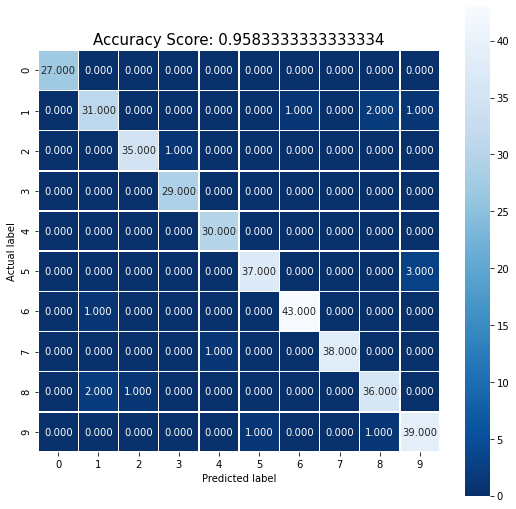

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Classification report

### MLP Neuronal Network  (bonus test)

In [8]:
print(digits.images.shape)
print(digits.target.shape)
print(digits.target)

(1797, 8, 8)
(1797,)
[0 1 2 ... 8 9 8]


In [9]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape


(1797, 64)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True, max_iter=250)

In [12]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.15249593
Iteration 2, loss = 1.68980144
Iteration 3, loss = 1.25918855
Iteration 4, loss = 0.90101278
Iteration 5, loss = 0.64705257
Iteration 6, loss = 0.50130506
Iteration 7, loss = 0.39892879
Iteration 8, loss = 0.34805643
Iteration 9, loss = 0.28101277
Iteration 10, loss = 0.25480912
Iteration 11, loss = 0.21190128
Iteration 12, loss = 0.20743182
Iteration 13, loss = 0.18213260
Iteration 14, loss = 0.15995221
Iteration 15, loss = 0.15057888
Iteration 16, loss = 0.13909420
Iteration 17, loss = 0.12906573
Iteration 18, loss = 0.11858621
Iteration 19, loss = 0.11661341
Iteration 20, loss = 0.10772064
Iteration 21, loss = 0.09977674
Iteration 22, loss = 0.09247116
Iteration 23, loss = 0.09095041
Iteration 24, loss = 0.08713646
Iteration 25, loss = 0.08637697
Iteration 26, loss = 0.08517056
Iteration 27, loss = 0.07921742
Iteration 28, loss = 0.08041866
Iteration 29, loss = 0.07065617
Iteration 30, loss = 0.06604370
Iteration 31, loss = 0.07067165
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, max_iter=250, random_state=1,
              solver='sgd', verbose=True)

In [13]:
predictions = mlp.predict(x_test)
predictions[:100] 

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 5, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8])

In [14]:
y_test[:100]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8])

In [15]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.9611111111111111


# 5) Gradient descent ?